In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
pwd

In [2]:
players = pd.read_csv('DIM_PLAYER.csv',encoding='ISO-8859-1')
player_match = pd.read_csv('DIM_PLAYER_MATCH.csv',encoding = 'ISO-8859-1')
team = pd.read_csv('DIM_TEAM.csv',encoding = 'ISO-8859-1')
ballsdetails = pd.read_csv('FACT_BALL_BY_BALL.csv',encoding = 'ISO-8859-1')
matchdetail  = pd.read_excel('DIM_MATCH.xlsx')

In [ ]:
player_match['Role_Desc'].unique()

In [ ]:
captain = player_match[player_match['Role_Desc'] == 'Captain']

In [ ]:
captain['Age_As_on_match'].unique()

In [ ]:
player_match['Age_As_on_match'].unique()

In [ ]:
sns.countplot(x = 'Age_As_on_match',data=player_match)
plt.figure(figsize=(40,40))

In [ ]:
matchdetail.describe(include='all')

In [ ]:
#Max toss winner team
matchdetail['Toss_Winner'].value_counts().head(3)

In [ ]:
# Unique teams
matchdetail.isnull().sum(axis = 0)

matchdetail.Team1.unique()

In [ ]:
matchdetail.match_winner.unique()

In [ ]:
# matchdetail[matchdetail.ManOfMach.value_counts()]
matchdetail.ManOfMach.value_counts().head(4)

In [ ]:
matchdetail.groupby(['ManOfMach']).count()['match_winner'].sort_values(ascending= False).head(5)

In [ ]:
matchdetail.Season_Year.value_counts()

In [ ]:
sns.countplot(x='Season_Year', data = matchdetail)

In [ ]:
matchdetail[(matchdetail.Season_Year == 2010)]['Team2'].value_counts()

In [ ]:
matchdetail[(matchdetail.Season_Year == 2011)]['Team2'].value_counts()

In [28]:
matchdetail_corr = pd.get_dummies(matchdetail,columns=['match_winner','City_Name']).drop(columns=['Country_id','Season_Year','Country_Name','match_date','Team2','Team1','ManOfMach','Outcome_Type','Win_Type','Toss_Name','Venue_Name','Toss_Winner','Win_Margin','Match_SK','match_id'])

In [29]:
matchdetail_corr.corr()

,match_winner_Chennai Super Kings,match_winner_Deccan Chargers,match_winner_Delhi Daredevils,match_winner_Gujarat Lions,match_winner_Kings XI Punjab,match_winner_Kochi Tuskers Kerala,match_winner_Kolkata Knight Riders,match_winner_Mumbai Indians,match_winner_Pune Warriors,match_winner_Rajasthan Royals,...,City_Name_Kolkata,City_Name_Mohali,City_Name_Mumbai,City_Name_Nagpur,City_Name_Port Elizabeth,City_Name_Pune,City_Name_Raipur,City_Name_Rajkot,City_Name_Ranchi,City_Name_Visakhapatnam
match_winner_Chennai Super Kings,1.000000,-0.082176,-0.123554,-0.054310,-0.132207,-0.036691,-0.139524,-1.536105e-01,-0.052137,-0.124655,...,-0.057705,-0.029911,-0.035599,-0.025883,0.051711,-0.064730,-0.036691,-0.047518,0.097398,-0.013316
match_winner_Deccan Chargers,-0.082176,1.000000,-0.071715,-0.031523,-0.076737,-0.021296,-0.080984,-8.916031e-02,-0.030262,-0.072354,...,-0.071072,-0.017361,-0.019261,0.204972,-0.023021,-0.015750,-0.021296,-0.027581,-0.023021,-0.028951
match_winner_Delhi Daredevils,-0.123554,-0.071715,1.000000,-0.047396,-0.115377,-0.032020,-0.121762,-1.340560e-01,-0.045500,-0.108787,...,-0.088862,-0.026103,-0.097705,-0.022588,0.016190,-0.002779,0.187300,0.001137,-0.034613,-0.002872
match_winner_Gujarat Lions,-0.054310,-0.031523,-0.047396,1.000000,-0.050715,-0.014075,-0.053522,-5.892557e-02,-0.020000,-0.047818,...,0.028491,0.129080,-0.023988,-0.009929,-0.015215,0.017635,-0.014075,0.249727,-0.015215,-0.019133
match_winner_Kings XI Punjab,-0.132207,-0.076737,-0.115377,-0.050715,1.000000,-0.034262,-0.130289,-1.434438e-01,-0.048686,-0.116405,...,-0.080228,0.099155,-0.064073,-0.024170,0.011111,-0.057828,-0.034262,0.036386,-0.037037,-0.008045
match_winner_Kochi Tuskers Kerala,-0.036691,-0.021296,-0.032020,-0.014075,-0.034262,1.000000,-0.036159,-3.980937e-02,-0.013512,-0.032305,...,0.023496,-0.007752,0.009529,-0.006708,-0.010279,-0.022426,-0.009509,-0.012315,-0.010279,-0.012926
match_winner_Kolkata Knight Riders,-0.139524,-0.080984,-0.121762,-0.053522,-0.130289,-0.036159,1.000000,-1.513825e-01,-0.051381,-0.122847,...,0.484844,-0.029477,-0.103024,-0.025507,-0.039087,0.047001,-0.036159,-0.008089,0.007107,-0.049154
match_winner_Mumbai Indians,-0.153610,-0.089160,-0.134056,-0.058926,-0.143444,-0.039809,-0.151383,1.000000e+00,-0.056569,-0.135250,...,0.004356,-0.032453,0.433484,-0.028083,0.043033,-0.032275,-0.039809,-0.051557,-0.043033,0.014759
match_winner_Pune Warriors,-0.052137,-0.030262,-0.045500,-0.020000,-0.048686,-0.013512,-0.051381,-5.656854e-02,1.000000,-0.045906,...,-0.045092,-0.011015,0.047497,-0.009532,-0.014606,0.179587,-0.013512,-0.017499,0.096156,-0.018368
match_winner_Rajasthan Royals,-0.124655,-0.072354,-0.108787,-0.047818,-0.116405,-0.032305,-0.122847,-1.352504e-01,-0.045906,1.000000,...,-0.089942,-0.026336,-0.052681,0.054019,0.015521,-0.028043,-0.032305,-0.041839,-0.034922,-0.003549


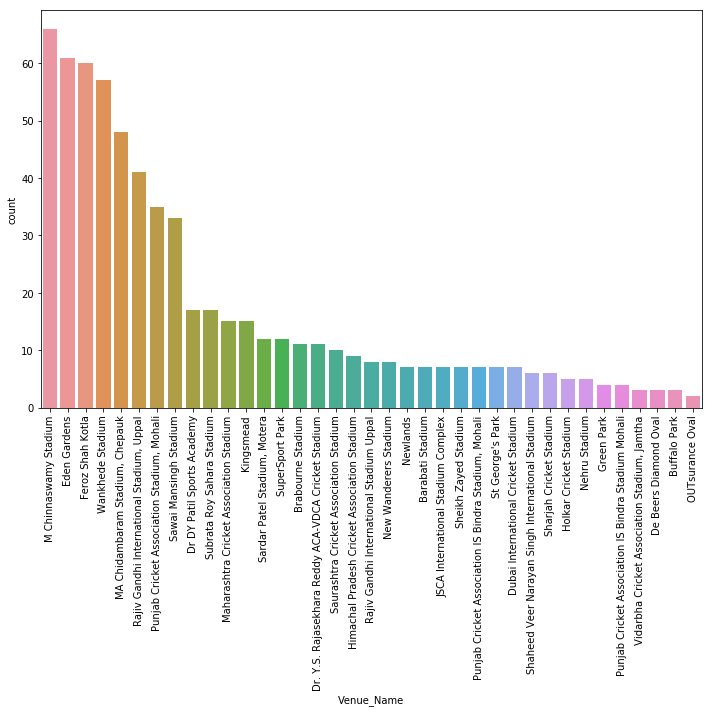

In [82]:
plt.figure(figsize= (10,10))
sns.countplot(x= 'Venue_Name', data = matchdetail, order = matchdetail.Venue_Name.value_counts().index)
plt.xticks( rotation=90)
plt.show
plt.tight_layout()


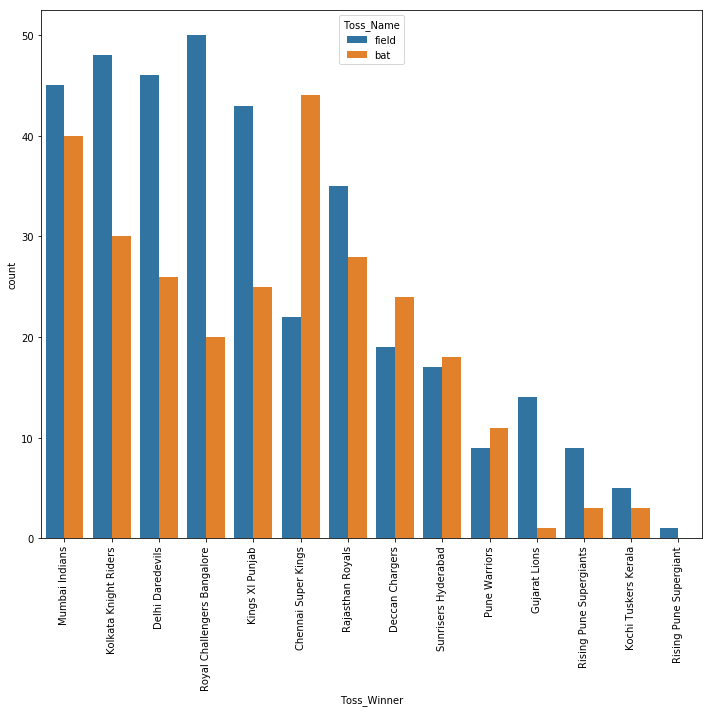

In [88]:
plt.figure(figsize= (10,10))
sns.countplot(x = 'Toss_Winner', data = matchdetail, order = matchdetail.Toss_Winner.value_counts().index, hue='Toss_Name')
plt.xticks( rotation=90)
plt.tight_layout()
plt.show()


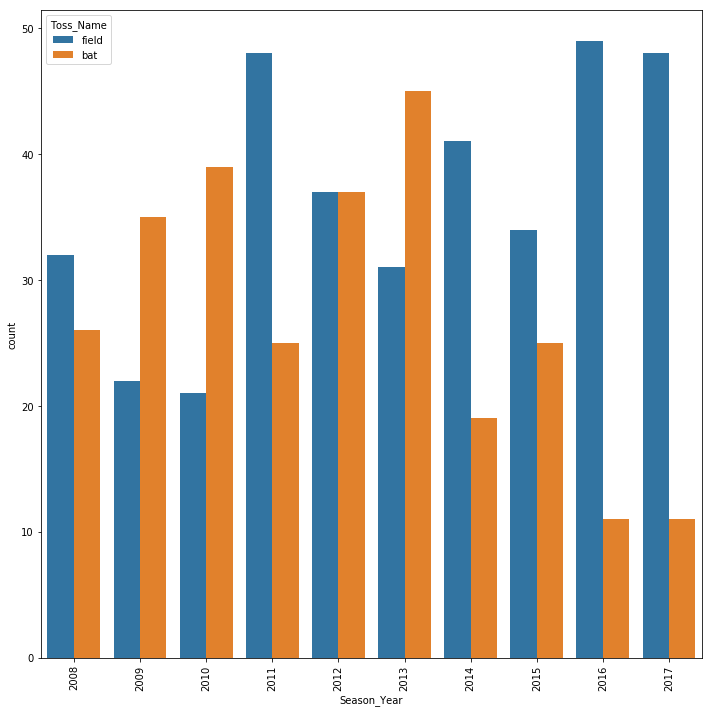

In [89]:
plt.figure(figsize= (10,10))
sns.countplot(x = 'Season_Year', data = matchdetail, hue='Toss_Name')
plt.xticks( rotation=90)
plt.tight_layout()
plt.show()


In [57]:
matchdetail.replace('Field','field',inplace= True)
matchdetail.replace('Bat','bat',inplace= True)

In [90]:
players.head()

,PLAYER_SK,Player_Id,Player_Name,DOB,Batting_hand,Bowling_skill,Country_Name
0,0,1,SC Ganguly,1972-07-08,Left-hand bat,Right-arm medium,India
1,1,2,BB McCullum,1981-09-27,Right-hand bat,Right-arm medium,New Zealand
2,2,3,RT Ponting,1974-12-19,Right-hand bat,Right-arm medium,Australia
3,3,4,DJ Hussey,1977-07-15,Right-hand bat,Right-arm offbreak,Australia
4,4,5,Mohammad Hafeez,1980-10-17,Right-hand bat,Right-arm offbreak,Pakistan


In [14]:
players.Batting_hand.unique()

array(['Left-hand bat', 'Right-hand bat'], dtype=object)

In [12]:
players.replace('\xa0Right-hand bat','Right-hand bat',inplace= True)

In [13]:
players.replace('Right-handed','Right-hand bat',inplace= True)

In [10]:
players.replace('\xa0Left-hand bat','Left-hand bat',inplace= True)

In [30]:
players.Bowling_skill.unique()

array(['Right-arm medium', 'Right-arm offbreak', 'Right-arm medium fast',
       'Legbreak googly', 'Left-arm medium-fast',
       'Slow left-arm orthodox', nan, 'Slow left-arm chinaman',
       'Legbreak', 'Right-arm fast', 'Right-arm bowler',
       'Left-arm medium', 'Left-arm fast'], dtype=object)

In [17]:
players.replace('\xa0Right-arm offbreak','Right-arm offbreak',inplace= True)

In [20]:
players.replace('\xa0Right-arm fast-medium','Right-arm fast-medium',inplace= True)

In [29]:
players.replace('\xa0Legbreak','Legbreak',inplace= True)
players.replace('\xa0Right-arm fast-medium','Right-arm medium fast',inplace= True)
players.replace('Right-arm medium-fast','Right-arm medium fast',inplace= True)
players.replace('\xa0Right-arm medium-fast','Right-arm medium fast',inplace= True)
players.replace('Left-arm fast-medium','Left-arm medium-fast',inplace= True)
players.replace('\xa0Right-arm offbreak','Right-arm offbreak',inplace= True)

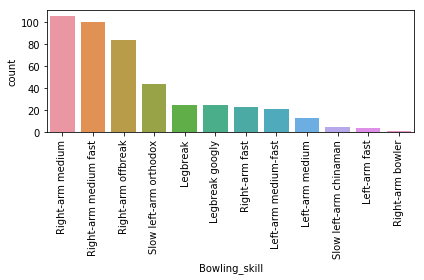

In [32]:
sns.countplot(x = 'Bowling_skill', data = players, order = players.Bowling_skill.value_counts().index)
plt.xticks( rotation=90)
plt.tight_layout()
plt.show()

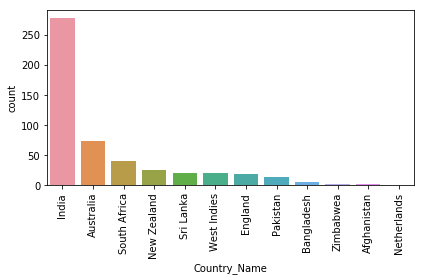

In [33]:
sns.countplot(x = 'Country_Name', data = players, order = players.Country_Name.value_counts().index)
plt.xticks( rotation=90)
plt.tight_layout()
plt.show()

In [35]:
agg = players['Country_Name'].value_counts()[:10]
# labels = list(reversed(list(agg.index )))
# values = list(reversed(list(agg.values)))

# trace1 = go.Pie(labels=labels, values=values, marker=dict(colors=['red']))
# layout = dict(title='Top Countries', legend=dict(orientation="h"));


# fig = go.Figure(data=[trace1], layout=layout)
# iplot(fig, filename='stacked-bar')
agg

India           277
Australia        74
South Africa     40
New Zealand      25
Sri Lanka        20
West Indies      20
England          18
Pakistan         13
Bangladesh        5
Zimbabwea         2
Name: Country_Name, dtype: int64

In [46]:
#Extra run by each team.
ballsdetails.Extra_Type.unique()

array(['legbyes', 'No Extras', 'wides', 'byes', 'noballs', 'penalty'],
      dtype=object)

In [45]:
ballsdetails.replace('Legbyes','legbyes', inplace= True)
ballsdetails.replace('Wides','wides', inplace= True)
ballsdetails.replace('Byes','byes',inplace= True)
ballsdetails.replace('Noballs', 'noballs', inplace = True)

In [48]:
ballsdetails.columns

Index(['Ball_key', 'MatcH_id', 'Over_id', 'Ball_id', 'Innings_No',
       'Team_Batting', 'Team_Bowling', 'Striker_Batting_Position',
       'StrikerKey', 'NonStrikerKey', 'BowlerKey', 'PlayerOutKey',
       'FeilderKey', 'Extra_Type', 'Runs_Scored', 'Extra_runs', 'Wides',
       'Legbyes', 'Byes', 'Noballs', 'Penalty', 'Bowler_Extras', 'Out_type',
       'Caught', 'Bowled', 'Run_out', 'LBW', 'Retired_hurt', 'Stumped',
       'caught_and_bowled', 'hit_wicket', 'ObstructingFeild', 'Bowler_Wicket',
       'Match_Date', 'Season', 'Striker', 'Non_Striker', 'Bowler',
       'Player_Out', 'Fielders', 'Striker_match_SK', 'StrikerSK',
       'NonStriker_match_SK', 'NONStriker_SK', 'Fielder_match_SK',
       'Fielder_SK', 'Bowler_match_SK', 'BOWLER_SK', 'PlayerOut_match_SK',
       'BattingTeam_SK', 'BowlingTeam_SK', 'Keeper_Catch', 'Player_out_sk'],
      dtype='object')

In [49]:
ballsdetails.Extra_Type.value_counts()

No Extras    142255
wides          4575
legbyes        2590
noballs         618
byes            412
penalty           1
Name: Extra_Type, dtype: int64